In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hmmlearn.hmm import GaussianHMM
%matplotlib inline


In [70]:
with open('tom_1.txt', 'r', encoding='utf-8',) as f:
    text = f.read().lower()
mask = re.sub('[^а-яА-Я]',' ', text)
words = ' '.join(mask.split())

In [71]:
words

642624

In [251]:
words[0:50]

'лев толстой война и мир том том часть первая часть'

In [76]:
RUS = 'абвгдеёжзийклмнопрстуфхцчшщьъыэюя '
POS = {l: i for i, l in enumerate(RUS)}

In [77]:
RUS

'абвгдеёжзийклмнопрстуфхцчшщьъыэюя '

In [80]:
probabilities = np.zeros((len(RUS), len(RUS)))
for cp, cn in zip(words[:-1], words[1:]):
    probabilities[POS[cp], POS[cn]] += 1
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

C:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [81]:
probabilities

array([[1.10663539e-04, 9.40640078e-03, 4.84706299e-02, ...,
        1.09999557e-02, 3.93740870e-02, 2.35801868e-01],
       [7.86927542e-02, 1.72006020e-03, 2.58009030e-03, ...,
        4.30015051e-04, 3.19286175e-02, 2.15007525e-02],
       [1.49251926e-01, 2.41964754e-04, 5.64584426e-04, ...,
        0.00000000e+00, 3.22619672e-03, 1.57882002e-01],
       ...,
       [0.00000000e+00, 5.55237550e-02, 0.00000000e+00, ...,
        6.58271322e-03, 0.00000000e+00, 6.15054379e-01],
       [0.00000000e+00, 1.68377165e-03, 1.35503528e-02, ...,
        4.40987813e-03, 1.02629891e-02, 5.70237332e-01],
       [1.84409936e-02, 4.51971989e-02, 9.22145478e-02, ...,
        4.98146321e-04, 9.64679510e-03, 0.00000000e+00]])

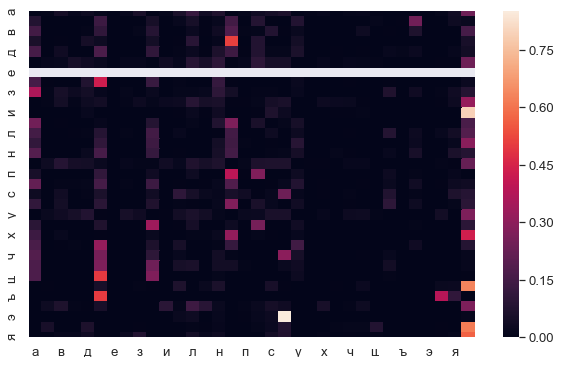

In [198]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(df)
plt.show()

Рассчитаем вероятность встретить строку из 4х символов, которая начинается на 'п' и заканчивается на 'р'.
Так как мы не знаем буквы на позиции 2 и 3, то перебором всех возможных вариантов посчитаем вероятность для любых сочетаний.

In [134]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
res = dict()
for c1 in RUS[:-1]:
    for c2 in RUS[:-1]:
        prob = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if prob > 0:
            #print(''.join(['п', c1, c2, 'р']), prob)
        tmp = ''.join(['п', c1, c2, 'р'])
        res[prob] = tmp

паар 6.610045953452247e-09
пабр 1.1959501499230666e-06
павр 9.253246050681304e-07
пагр 1.6345931341464004e-06
падр 3.7350927463710946e-06
паер 1.9378942808247883e-06
пазр 8.612655788340367e-07
паир 3.190135527101422e-08
пайр 9.83653892703631e-08
пакр 5.423745531074212e-06
памр 1.0115912285813325e-07
панр 8.090164548300337e-08
паор 6.706778088396343e-09
папр 4.408767889358891e-06
парр 6.569463195453782e-08
паср 4.873667849468752e-07
патр 6.063180523826191e-06
паур 7.055873817650653e-08
пафр 2.8615528480829905e-06
пахр 2.203868275730565e-07
пачр 2.884020342066358e-08
пашр 8.525874720447519e-09
пащр 3.4785249689226015e-09
паэр 6.20049325598465e-10
паюр 2.0795311041094053e-07
паяр 1.2412592464984886e-07
пгар 4.195609158021096e-08
пгвр 9.979115947603363e-10
пгдр 7.522669954377641e-08
пгер 6.234569779682426e-08
пгир 1.053925196024511e-08
пгкр 6.5232783161540814e-09
пгмр 2.032792796464972e-11
пгнр 2.2325037988251956e-10
пгор 6.308512093898393e-07
пгрр 1.627523164292098e-09
пгср 2.413123904402

In [135]:
max(list(res.keys()))

0.00012730121833328477

В результате максимальную вероятность иммем для слова "прер"

In [136]:
res[max(list(res.keys()))]

'прер'

In [264]:
pd.DataFrame(res.items(), columns = ['probability', 'word']).sort_values(by=['probability'], ascending = False).head(10)

,probability,word
257,0.000127,прер
264,0.000092,прор
252,0.000066,прар
223,0.000046,потр
209,0.000043,погр
210,0.000043,подр
220,0.000036,попр
207,0.000030,побр
211,0.000026,поер
269,0.000015,прур


Сгенерируем слово, начинающееся с бувы "б" и имеющее длинну 8 символов 

In [159]:
s = []
start = 'б'
s.append(start)
length = 8
pro = probabilities[:-1, :-1]
for i in range(length-1):
    index = POS[s[i]]
    next_char = np.random.choice(list(POS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бывшенин


Построим наивный прогноз временного ряда инекса Доу-Джонса

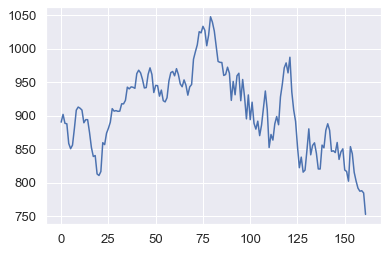

In [220]:
series = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']
values = series.values.reshape(-1,1)
plt.plot(series)

In [221]:
for n in range(1, 10):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

C:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


1 -894.2620483582102
2 -820.6341453620578
3 -786.837533266773
4 -752.0201472668962
5 -737.1181111930919
6 -729.5671112589437
7 -713.7233991716985
8 -702.1057754508196
9 -690.9832936468097


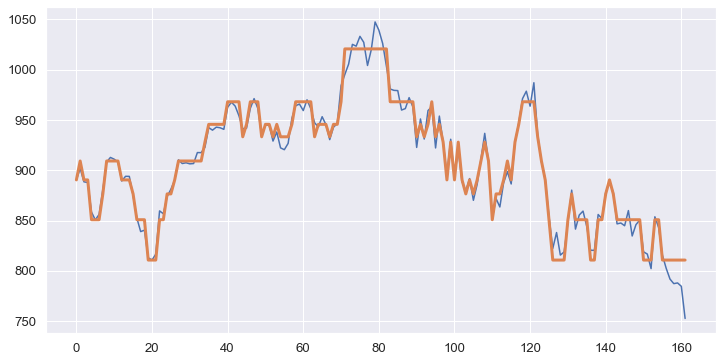

In [222]:

model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

при 10 компонентах достаточно хорошо описывается ВР. 

вот матрица переходных состояний

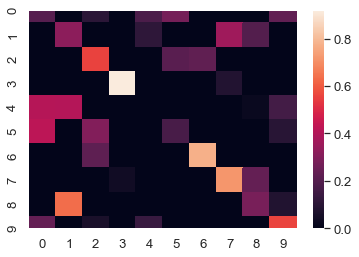

In [229]:
sns.heatmap(model.transmat_)

Попробуем прдсказать методом наивного байеса. у нас есть матрица вероятностей переходов между состояниями. берем последний эелмент известно последовательности и согласно матрицы находим следующее скрытое состояние, а уже на его основе наблюдаемое значение.

In [237]:
hidden_series = labels[-1]
prediction = []
for i in range(20):
    next = np.random.choice(10, p=model.transmat_[hidden_series])
    prediction.append(model.means_[next])

In [243]:
prediction

[array([810.67176508]),
 array([810.67176508]),
 array([810.67176508]),
 array([810.67176508]),
 array([850.79754797]),
 array([810.67176508]),
 array([810.67176508]),
 array([810.67176508]),
 array([810.67176508]),
 array([850.79754797]),
 array([810.67176508]),
 array([810.67176508]),
 array([810.67176508]),
 array([810.67176508]),
 array([810.67176508]),
 array([810.67176508]),
 array([810.67176508]),
 array([850.79754797]),
 array([810.67176508]),
 array([810.67176508])]

In [244]:
range(len(values), 20)

range(162, 20)

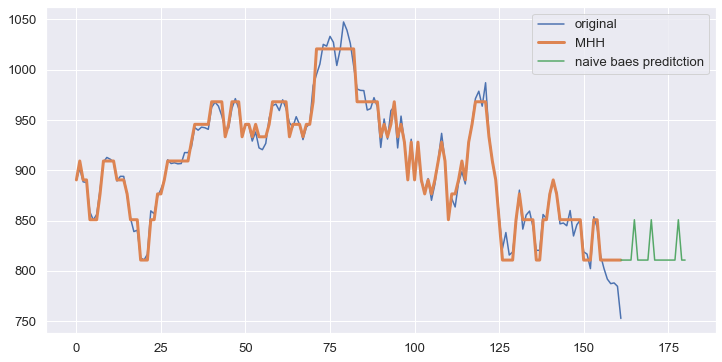

In [248]:
plt.figure(figsize=(12, 6))
plt.plot(values, label = 'original')
plt.plot(means, linewidth=3, label = 'MHH')
plt.plot(range(len(values)-1, len(values) + 20-1), prediction, label = 'naive baes preditction')
plt.legend()